задание 1

In [ ]:
!cp /content/drive/MyDrive/data_decision_trees.txt .

cp: cannot stat '/content/drive/MyDrive/data_decision_trees.txt': No such file or directory


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_squared_error

<ipython-input-4-e55fef9448a8>:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=100, facecolors='black',


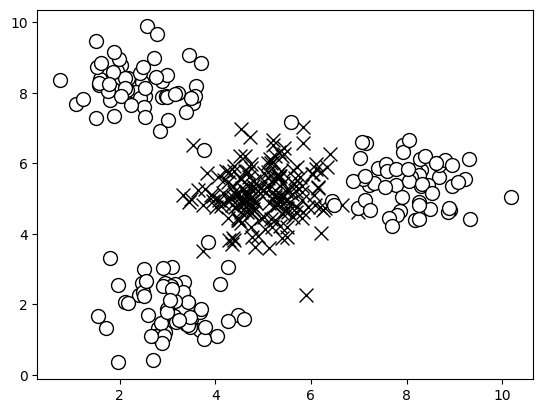

In [ ]:
input_file='data_decision_trees.txt'
data=np.loadtxt(input_file,delimiter=',')
X,y=data[:,:-1],data[:,-1]
# Разделение данных на два класса на основе меток (0 и 1)
class_0=np.array(X[y==0])#метка = 0
class_1=np.array(X[y==1])#метка = 1
# Создание точечной диаграммы для визуализации двух классов
plt.figure()
# Точечная диаграмма для класса 0 с черными маркерами 'x'
plt.scatter(class_0[:, 0], class_0[:, 1], s=100, facecolors='black',
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=100, facecolors='white',
        edgecolors='black', linewidth=1, marker='o',alpha=1)#alpha-прозрачность (можно убрать)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.2, random_state=5)#test_size-пропорция набора данных, который будет включен в тестовое разделение

tree_clf=DecisionTreeClassifier(random_state=0,max_depth=2,min_samples_split=2,min_samples_leaf=1)#max_depth-Максимальная глубина залегания дерева, min_samples_split-Минимальное количество выборок, необходимое для разделения внутреннего узла, min_samples_leaf-Минимальное количество образцов, которое должно находиться в конечном узле
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
!cp /content/drive/MyDrive/utilities.py .
from utilities import visualize_classifier
from sklearn.metrics import classification_report

In [ ]:
# Прогнозы для обучающего и тестового наборов данных
pred_train=tree_clf.predict(X_train)
pred_test=tree_clf.predict(X_test)
# Вычисление среднеквадратичной ошибки для обучающего и тестового наборов
mse_test= mean_squared_error(y_test,pred_test)
mse_train=mean_squared_error(y_train,pred_train)

print(f'MSE на обучении {mse_train:2f}')#MSE-среднеквадратичная ошибка
print(f'MSE на тесте {mse_test:2f}')

MSE на обучении 0.048611
MSE на тесте 0.055556


In [ ]:
class_names = ['Class-0', 'Class-1']
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, pred_train, target_names=class_names))
#Создается список с метками классов для использования в отчете о классификации


Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.95      0.95      0.95       144
     Class-1       0.95      0.95      0.95       144

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288



In [ ]:
#Вывод отчета о классификации для тестового набора данных
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, pred_test, target_names=class_names))


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.90      1.00      0.95        36
     Class-1       1.00      0.89      0.94        36

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



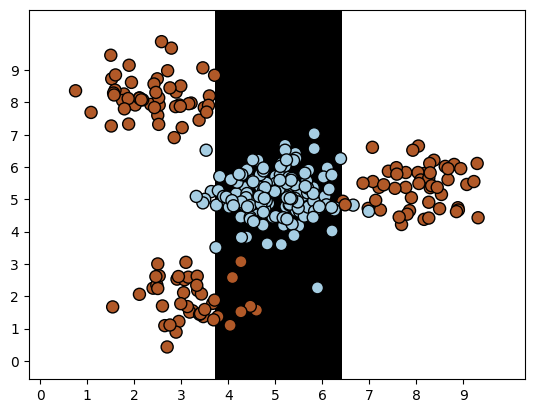

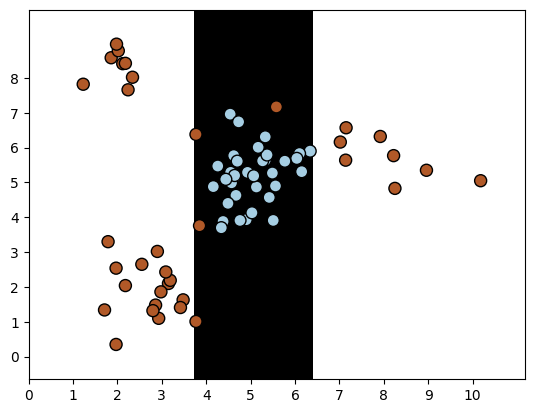

In [ ]:
visualize_classifier(tree_clf, X_train, y_train)
visualize_classifier(tree_clf, X_test, y_test)

задание 2

In [ ]:
!cp /content/drive/MyDrive/data_random_forests.txt .

cp: cannot stat '/content/drive/MyDrive/data_random_forests.txt': No such file or directory


In [ ]:
input_file='data_random_forests.txt'
data=np.loadtxt(input_file,delimiter=',')
X,y=data[:,:-1],data[:,-1]

class_0=np.array(X[y==0])#метка = 0
class_1=np.array(X[y==1])#метка = 1
class_2=np.array(X[y==2])#метка = 2
# Создание точечной диаграммы для визуализации трех классов
plt.figure()
# Точечная диаграмма для класса 0 с черными маркерами 'x'
plt.scatter(class_0[:, 0], class_0[:, 1], s=100, facecolors='black',
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=100, facecolors='white',
        edgecolors='black', linewidth=1, marker='o',alpha=1)#alpha-прозрачность (можно убрать)
plt.scatter(class_2[:, 0], class_2[:, 1], s=100, facecolors='green',
        edgecolors='black', linewidth=1, marker='p',alpha=0.5)

FileNotFoundError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.2, random_state=5)#test_size-пропорция набора данных, который будет включен в тестовое разделение
# Создание и обучение классификатора Random Forest
random_clf=RandomForestClassifier(random_state=0,max_depth=4,n_estimators=200)#max_depth-Максимальная глубина залегания дерева
random_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

 Он использует несколько деревьев решений, которые выбирают случайные подмножества признаков для каждого дерева, и использует усреднение для улучшения точности прогнозирования и контроля переобучения

In [ ]:
# Предсказания для обучающего и тестового наборов данных
pred_train=random_clf.predict(X_train)
pred_test=random_clf.predict(X_test)
# Вычисление среднеквадратичной ошибки для обучающего и тестового наборов
mse_test= mean_squared_error(y_test,pred_test)
mse_train=mean_squared_error(y_train,pred_train)

print(f'MSE на обучении {mse_train:2f}')#MSE-среднеквадратичная ошибка
print(f'MSE на тесте {mse_test:2f}')

MSE на обучении 0.223611
MSE на тесте 0.222222


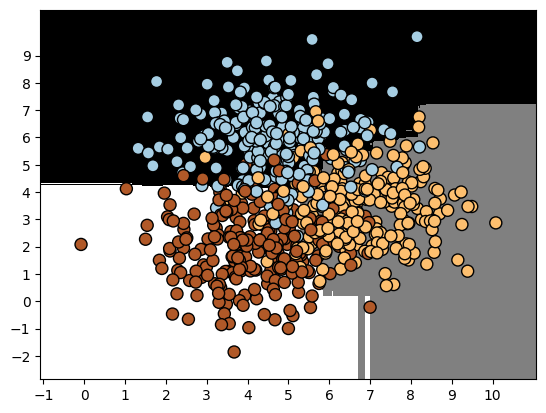

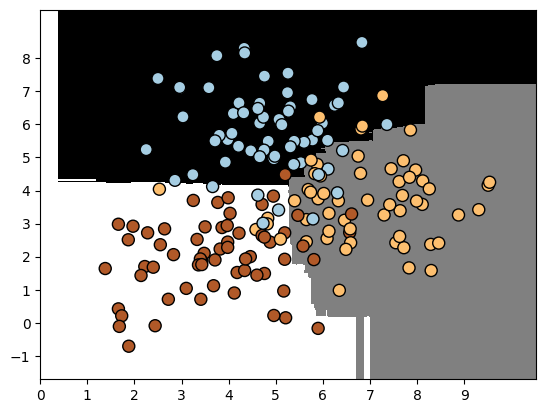

In [ ]:
visualize_classifier(random_clf, X_train, y_train)
visualize_classifier(random_clf, X_test, y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.2, random_state=5)#test_size-пропорция набора данных, который будет включен в тестовое разделение

extra_clf=ExtraTreesClassifier(random_state=0,max_depth=8,n_estimators=90)#max_depth-Максимальная глубина залегания дерева, n_estimators-Количество деревьев в лесу
extra_clf.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=8, n_estimators=90, random_state=0)

Он является вариантом алгоритма Decision Tree Classifier, но с некоторыми отличиями. Вместо того, чтобы выбирать наилучшее разделение на каждом узле, Extra Tree Classifier выбирает случайное разделение, что делает его более устойчивым к шуму и выбросам

In [ ]:
pred_train=extra_clf.predict(X_train)
pred_test=extra_clf.predict(X_test)
mse_test= mean_squared_error(y_test,pred_test)
mse_train=mean_squared_error(y_train,pred_train)

print(f'MSE на обучении {mse_train:2f}')#MSE-среднеквадратичная ошибка
print(f'MSE на тесте {mse_test:2f}')

MSE на обучении 0.208333
MSE на тесте 0.222222


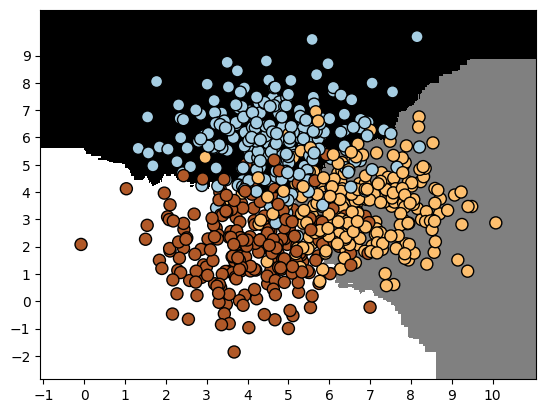

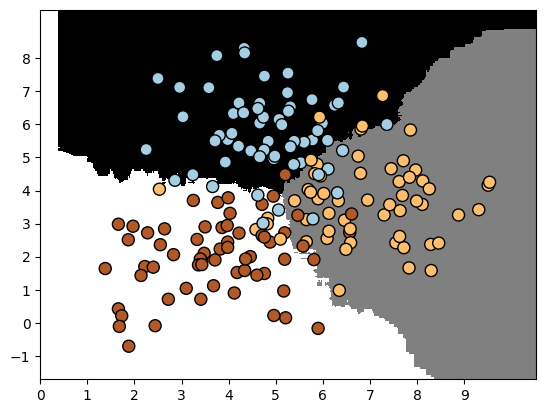

In [ ]:
visualize_classifier(extra_clf, X_train, y_train)
visualize_classifier(extra_clf, X_test, y_test)

задание 3

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/data_imbalance.txt" .

In [ ]:
input_file='data_imbalance.txt'
data=np.loadtxt(input_file,delimiter=',')
X,y=data[:,:-1],data[:,-1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.2, random_state=5)#test_size-пропорция набора данных, который будет включен в тестовое разделение

extra2_clf=ExtraTreesClassifier(random_state=0,max_depth=4,n_estimators=500)#max_depth-Максимальная глубина залегания дерева
extra2_clf.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=4, n_estimators=500, random_state=0)

In [ ]:
pred_train=extra2_clf.predict(X_train)
pred_test=extra2_clf.predict(X_test)
mse_test= mean_squared_error(y_test,pred_test)
mse_train=mean_squared_error(y_train,pred_train)

print(f'MSE на обучении {mse_train:2f}')#MSE-среднеквадратичная ошибка
print(f'MSE на тесте {mse_test:2f}')

MSE на обучении 0.161667
MSE на тесте 0.183333


In [ ]:
class_names = ['Class-0', 'Class-1']

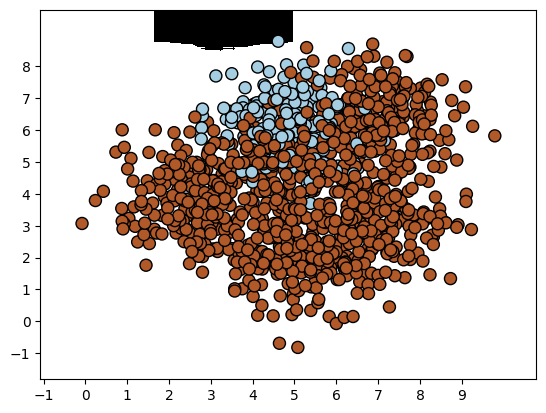

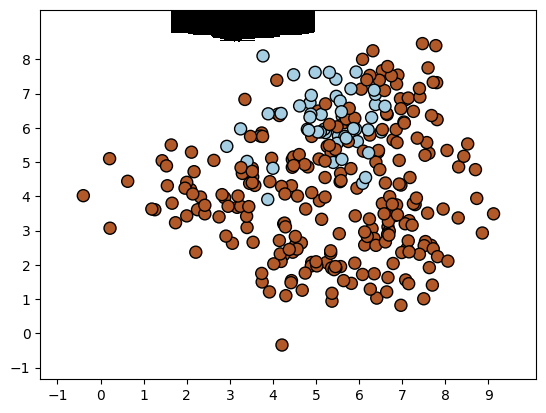

In [ ]:
visualize_classifier(extra2_clf, X_train, y_train)
visualize_classifier(extra2_clf, X_test, y_test)

Проблема дисбаланса классов обычно возникает, когда экземпляров одних классов намного больше, чем других. В таких случаях стандартные классификаторы, как правило, перегружены большими классами и игнорируют маленькие.

In [ ]:
extra3_clf=ExtraTreesClassifier(random_state=0,max_depth=4,n_estimators=500, class_weight='balanced')#max_depth-Максимальная глубина залегания дерева
extra3_clf.fit(X_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                     random_state=0)

In [ ]:
pred_train=extra3_clf.predict(X_train)
pred_test=extra3_clf.predict(X_test)
mse_test= mean_squared_error(y_test,pred_test)
mse_train=mean_squared_error(y_train,pred_train)

print(f'MSE на обучении {mse_train:2f}')#MSE-среднеквадратичная ошибка
print(f'MSE на тесте {mse_test:2f}')

MSE на обучении 0.204167
MSE на тесте 0.196667


In [ ]:
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, pred_test, target_names=class_names))


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.54      0.73      0.62        55
     Class-1       0.93      0.86      0.90       245

    accuracy                           0.84       300
   macro avg       0.74      0.79      0.76       300
weighted avg       0.86      0.84      0.85       300



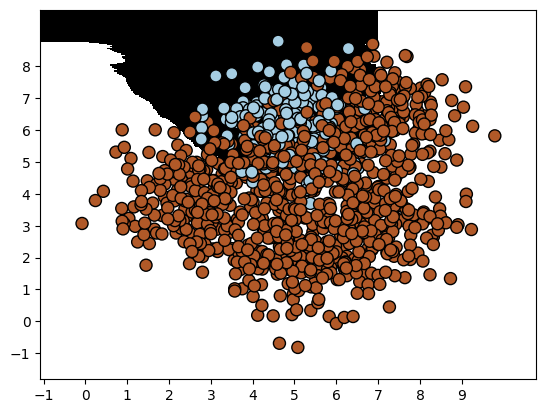

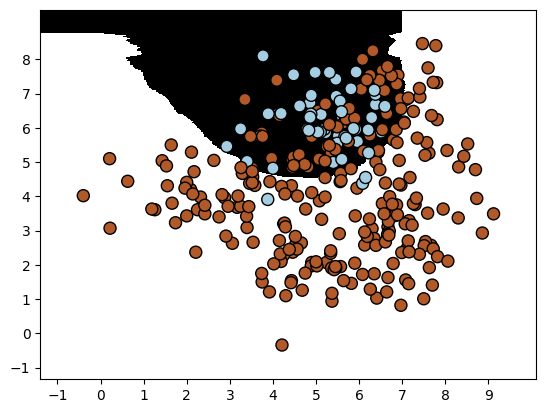

In [ ]:
visualize_classifier(extra3_clf, X_train, y_train)
visualize_classifier(extra3_clf, X_test, y_test)

задание 4

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# задание сетки параметров для перебора
param_grid = {'max_depth': [2,4,6,8,10,12], 'min_samples_split': [2,4,6,8,10,12]}

# создание экземпляра GridSearchCV
grid_search = GridSearchCV(random_clf, param_grid=param_grid, cv=5)#cv Определяет стратегию разделения перекрестной проверки

grid_search.fit(X, y)

# вывод метрики precision_weighted для каждого набора параметров
for i in range(len(grid_search.cv_results_['params'])):
    print("Параметры:", grid_search.cv_results_['params'][i])
    print("Точность (взвешенная):", grid_search.cv_results_['mean_test_score'][i])

Параметры: {'max_depth': 2, 'min_samples_split': 2}
Точность (взвешенная): 0.8333333333333334
Параметры: {'max_depth': 2, 'min_samples_split': 4}
Точность (взвешенная): 0.8333333333333334
Параметры: {'max_depth': 2, 'min_samples_split': 6}
Точность (взвешенная): 0.8333333333333334
Параметры: {'max_depth': 2, 'min_samples_split': 8}
Точность (взвешенная): 0.8333333333333334
Параметры: {'max_depth': 2, 'min_samples_split': 10}
Точность (взвешенная): 0.8333333333333334
Параметры: {'max_depth': 2, 'min_samples_split': 12}
Точность (взвешенная): 0.8333333333333334
Параметры: {'max_depth': 4, 'min_samples_split': 2}
Точность (взвешенная): 0.8846666666666666
Параметры: {'max_depth': 4, 'min_samples_split': 4}
Точность (взвешенная): 0.8859999999999999
Параметры: {'max_depth': 4, 'min_samples_split': 6}
Точность (взвешенная): 0.8873333333333333
Параметры: {'max_depth': 4, 'min_samples_split': 8}
Точность (взвешенная): 0.8859999999999999
Параметры: {'max_depth': 4, 'min_samples_split': 10}
Точно

In [ ]:
class_names = ['Class-0', 'Class-1']
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, grid_search.predict(X_train), target_names=class_names))


Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.69      0.67      0.68       195
     Class-1       0.94      0.94      0.94      1005

    accuracy                           0.90      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.90      0.90      0.90      1200



In [ ]:
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, grid_search.predict(X_test), target_names=class_names))


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.69      0.65      0.67        55
     Class-1       0.92      0.93      0.93       245

    accuracy                           0.88       300
   macro avg       0.81      0.79      0.80       300
weighted avg       0.88      0.88      0.88       300

